In [45]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import sklearn as sk
from sklearn import tree
from sklearn import preprocessing
from sklearn import metrics
from sklearn import model_selection

In [46]:
col_names = ['Id_number', 'Clump_Thickness', 'Uniformity_Cell_Size', 'Uniformity_Cell_Shape',
'Marginal_Adhesion', 'Epithelial_Cell_Size', 'Bare_Nuclei', 'Bland_Chromatin',
'Normal_Nucleoli', 'Mitoses', 'Class']
data = pd.read_csv('s3://rmit-ml-2020s1-lab-data/UCI_data/breast-cancer-wisconsin.data', names=col_names)

In [47]:
data1 = data.dropna()
data2 = data.fillna(value = 0)

In [48]:
from sklearn.impute import SimpleImputer
imp_mean = SimpleImputer(missing_values=np.nan, strategy='mean')
imp_mean = imp_mean.fit(data)
data = imp_mean.transform(data)
data = pd.DataFrame(data=data, columns=col_names)

In [49]:
att_names = col_names[:-1]
Y = (data['Class']-2)/2
X = data.drop(['Class'], axis = 1)

In [50]:
from sklearn.model_selection import train_test_split
TrainX, TestX, TrainY, TestY = train_test_split(X, Y, test_size = 0.3)

In [51]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score, accuracy_score
logReg_orig = LogisticRegression(C=10000, max_iter=100, solver='liblinear')
scores = model_selection.cross_val_score(logReg_orig, TrainX, TrainY, cv=10)
print("Cross Val Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Cross Val Accuracy: 0.65 (+/- 0.01)


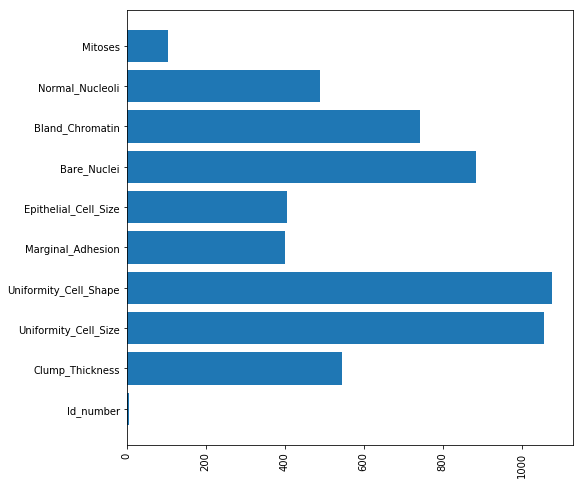

In [52]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2, f_classif

featureSelector = SelectKBest(score_func=f_classif, k=6).fit(TrainX,TrainY)

plt.figure(figsize=(8,8))
scores = featureSelector.scores_
plt.xticks(rotation='vertical')
plt.barh(att_names, scores, )

TrainX_new = featureSelector.transform(TrainX)
TestX_new = featureSelector.transform(TestX)

In [ ]:
from sklearn.feature_selection import RFE
model = LogisticRegression(C=10000, max_iter=100, solver='liblinear')
rfe = RFE(model, 6).fit(TrainX, TrainY)
print("Num Features: %s" % (rfe.n_features_))
sel_inx = np.ix_(rfe.support_)[0].tolist()
print("Selected Features: %s" % [att_names[i] for i in sel_inx])

TrainX_new = rfe.transform(TrainX)
TestX_new = rfe.transform(TestX)

In [ ]:
from sklearn.decomposition import PCA
components = 10
pca = PCA(n_components=components).fit(TrainX)

print(pca.explained_variance_ratio_)
plt.bar(np.arange(1, components+1), pca.explained_variance_ratio_)
plt.ylabel("Explained Variance Ratio")
plt.xlabel("Feature")
plt.show()

In [53]:
from sklearn.decomposition import PCA
components = 2
pca = PCA(n_components=components).fit(TrainX)
TrainX_new = pca.transform(TrainX)
TestX_new = pca.transform(TestX)

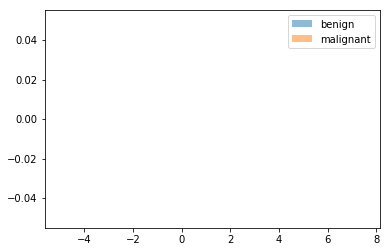

In [54]:
plus = TrainY == 1
X_plus = TrainX_new[plus,0]
X_minus = TrainX_new[~plus,0]
bins = np.linspace(-5, 7.5, 100)
plt.hist(X_plus, bins, alpha=0.5, label='benign')
plt.hist(X_minus, bins, alpha=0.5, label='malignant')
plt.legend(loc='upper right')
plt.show()